In [1]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

import scipy

from itertools import combinations

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

import os
import sys

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools



# sns.set_style('dark')
# sns.set_style('ticks')
# plt.style.use('dark_background')

In [2]:
from matplotlib.collections import LineCollection

def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale 
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    return lc

In [3]:
condition_properties = {
                        'Evo1D_IRAs':{1:[0,1,4,7,10,13,16,19,22,24],
                                      2:[0,1,4,7,10,13,16,19,22,24]},
                        'Evo1D_TCG':{1:[0,1,4,8,10,13,16,19,22,24],
                                    2:[0,1,4,8,10,13,16,19,22,24]},
                        
                        'Evo2D_Ira1_Mis':{1:[0,1,4,7,10,13,17,21,25],
                                         2:[0,1,4,7,10,13,17,21,25]},
                        'Evo2D_Ira1_Non':{1:[0,1,4,7,10,13,17,21,25],
                                         2:[0,1,4,7,10,13,17,21,25]},
                        
                        'Evo3D_Ira1_Mis':{1:[0,1,4,7,10,14,17,21],
                                         2:[0,1,4,7,10,14,17,21],
                                         3:[0,1,4,7,10,14,17,21]},
                        'Evo3D_Ira1_Non':{1:[0,1,4,7,10,14,17,21],
                                         2:[0,1,4,7,10,14,17,21],
                                         3:[0,1,4,7,10,14,17,21]},
                       }

condition_colors = {key:sns.color_palette()[i] for i,key in enumerate(condition_properties.keys())}



n_gens = 8
effective_n = 6 * 10**8 

NameError: name 'this_data' is not defined

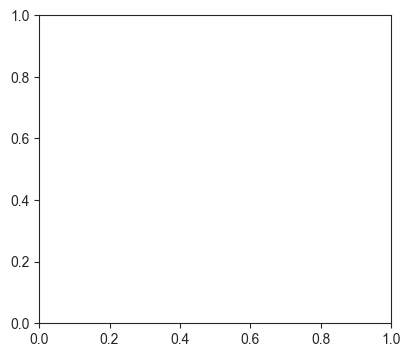

In [6]:

this_fit_mut = p.read_csv(f'FitMut2_processing/out_fitmut1_thresholded/{condition}_{rep}_MutSeq_Result.csv')

fitness_order = np.argsort(this_fit_mut['Fitness'].values)

fig,ax = plt.subplots(figsize=(10,4))
plt.subplot(1,2,1)
these_ts = np.tile(timepoints,this_data[all_samples].shape[0]).reshape(this_data[all_samples].shape)
these_freqs = (this_data[all_samples]/np.nansum(this_data[all_samples],axis=0)).values
these_freqs = these_freqs[fitness_order,:]

lc = multiline(these_ts,these_freqs, 
               this_fit_mut['Fitness'].values[fitness_order], cmap='Reds', lw=0.5)

axcb = fig.colorbar(lc)
axcb.set_label('Fitness')

plt.yscale('symlog',linthresh=1/(max(np.nansum(this_data[all_samples],axis=0))+10))
plt.xticks(timepoints,timepoints)

plt.subplot(1,2,2)
#         these_ts = np.tile(timepoints,this_data[all_samples].shape[0]).reshape(this_data[all_samples].shape)
#         these_freqs = (this_data[all_samples]/np.nansum(this_data[all_samples],axis=0)).values
#         these_freqs = these_freqs[fitness_order,:]

lc = multiline(these_ts,these_freqs, 
               this_fit_mut['Establishment_Time'].values[fitness_order], cmap='Blues', lw=0.5)

axcb = fig.colorbar(lc)
axcb.set_label('Establishment Time')

plt.yscale('symlog',linthresh=1/(max(np.nansum(this_data[all_samples],axis=0))+10))
plt.xticks(timepoints,timepoints)

plt.tight_layout()
# plt.savefig(f'figures/{condition}_{rep}_trajectories_fitness_establishment.pdf',bbox_inches='tight')


NameError: name 'this_data' is not defined

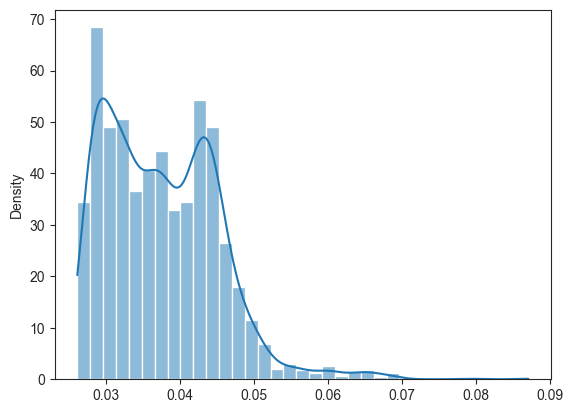

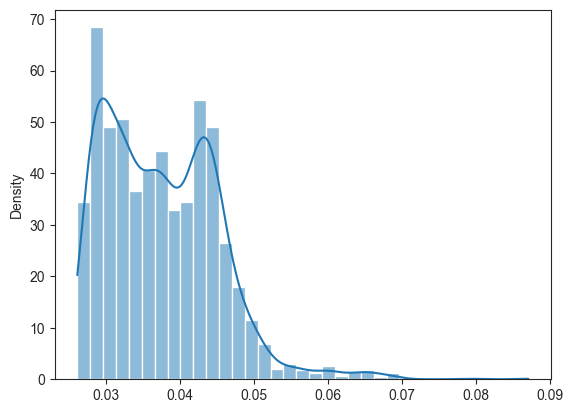

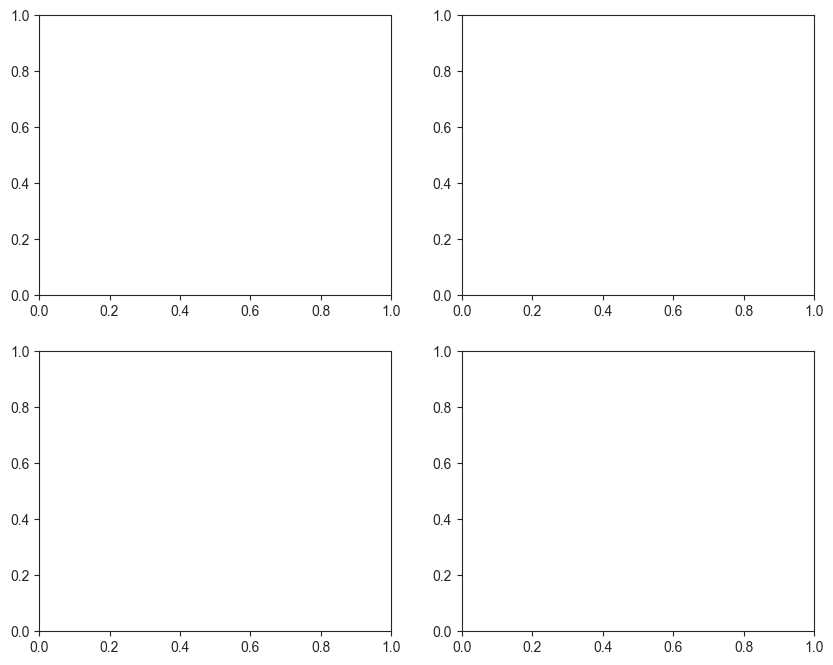

In [5]:


# condition_properties = {'Evo3D_Ira1_Non':{1:[0,1,4,7,10,14,17,21],
#                                          2:[0,1,4,7,10,14,17,21],
#                                          3:[0,1,4,7,10,14,17,21]}}

all_dfes,all_dfes_ax = plt.subplots()

adaptives_big = {}

for condition,reps in condition_properties.items():
    this_data = p.read_csv(f'{condition}_counts_curated.csv')
    
#     this_trajs = plt.figure(figsize=(4*len(reps.keys())+1,4*2))
#     grids

    this_dfe,this_dfe_ax = plt.subplots()
    
    traj_fig,traj_ax = plt.subplots(figsize=(10,4*len(reps)),nrows=len(reps),ncols=2)

    for rep,timepoints in reps.items():
        
        all_samples = []
        for time in timepoints:
            if time == 0:
                all_samples.append(f'{condition}_0_0_count')
            else:
                all_samples.append(f'{condition}_{rep}_{time}_count')
                
    
#         this_data['barcode'] = this_data['fused_bc']

        this_fit_mut = p.read_csv(f'FitMut2_processing/out_fitmut1_thresholded/{condition}_{rep}_MutSeq_Result.csv')

        mean_fitness = this_fit_mut['Mean_Fitness'].values
        mean_fitness = mean_fitness[~np.isnan(mean_fitness)]

        kappas = this_fit_mut['Kappa_Value'].values
        kappas = kappas[~np.isnan(kappas)]


        mutant_cell_fraction = this_fit_mut['Mutant_Cell_Fraction'].values
        mutant_cell_fraction = mutant_cell_fraction[~np.isnan(mutant_cell_fraction)]


        this_fit_mut = this_fit_mut[['Fitness','Establishment_Time','Error_Fitness','Error_Establishment_Time']]
#         this_fit_mut['barcode'] = this_data['barcode']
    #     inference_time = 

    #     if condition == 'Evo2D_Ira1_non':
    #         break
        adaptive_only = this_fit_mut[this_fit_mut['Fitness']>0]
        adaptives_big[f'{condition}_{rep}'] = adaptive_only

# #         sns.kdeplot(adaptive_only['Fitness'].values,label=f'{condition}_{rep}',alpha=0.5)
#         plt.gca()

        sns.histplot(adaptive_only['Fitness'].values,stat='density',label=f'{condition}_{rep}',kde=True,ax=all_dfes_ax,
                    color=condition_colors[condition])
    
        sns.histplot(adaptive_only['Fitness'].values,stat='density',label=f'{condition}_{rep}',kde=True,ax=this_dfe_ax,
                    color=condition_colors[condition])
        
        
        fitness_order = np.argsort(this_fit_mut['Fitness'].values)
        
        these_ts = np.tile(timepoints,this_data[all_samples].shape[0]).reshape(this_data[all_samples].shape)
        these_freqs = (this_data[all_samples]/np.nansum(this_data[all_samples],axis=0)).values
        these_freqs = these_freqs[fitness_order,:]
        
#         traj_fit.add_subplot()

        lc = multiline(these_ts,these_freqs, 
                       this_fit_mut['Fitness'].values[fitness_order], ax=traj_ax[rep-1,0],
                       cmap='Reds', lw=0.5)

#         axcb = traj_fig.colorbar(lc)
#         axcb.set_label('Fitness')

        traj_ax[rep-1,0].set_yscale('log')
        traj_ax[rep-1,0].set_xticks(timepoints,timepoints)
        
        traj_ax[rep-1,0].set_xlabel('Transfer')
        traj_ax[rep-1,0].set_ylabel('Frequency')

#         traj_fit.add_subplot()

        traj_ax[rep-1,0].set_facecolor('lightgrey')

        lc = multiline(these_ts,these_freqs, 
                       this_fit_mut['Establishment_Time'].values[fitness_order], ax=traj_ax[rep-1,1],
                       cmap='Blues', lw=0.5)

#         axcb = traj_fig.colorbar(lc)
#         axcb.set_label('Establishment Time')

        traj_ax[rep-1,1].set_yscale('log')
        traj_ax[rep-1,1].set_xticks(timepoints,timepoints)
        
        traj_ax[rep-1,1].set_xlabel('Transfer')
        traj_ax[rep-1,1].set_ylabel('Frequency')
        
        traj_ax[rep-1,1].set_facecolor('lightgrey')
    
    this_dfe_ax.legend()
#     this_dfe.savefig(f'figures/fitmut1/{condition}_dfes.pdf',bbox_inches='tight')
        
    
    traj_fig.tight_layout()
#     traj_fig.savefig(f'figures/fitmut1/{condition}_trajectories_fitness_establishment.pdf',bbox_inches='tight')

all_dfes_ax.legend()
# all_dfes.savefig(f'figures/fitmut1/all_dfes.pdf',bbox_inches='tight')



In [7]:
 this_data = p.read_csv(f'{condition}_counts_curated.csv')

In [8]:
this_data

,high_diversity_BC,low_diversity_BC,Evo1D_IRAs_0_0_count,fused_bc,Evo1D_IRAs_1_1_count,Evo1D_IRAs_2_1_count,Evo1D_IRAs_1_4_count,Evo1D_IRAs_2_4_count,Evo1D_IRAs_1_7_count,Evo1D_IRAs_2_7_count,...,Evo1D_IRAs_1_13_count,Evo1D_IRAs_2_13_count,Evo1D_IRAs_1_16_count,Evo1D_IRAs_2_16_count,Evo1D_IRAs_1_19_count,Evo1D_IRAs_2_19_count,Evo1D_IRAs_1_22_count,Evo1D_IRAs_2_22_count,Evo1D_IRAs_1_24_count,Evo1D_IRAs_2_24_count
0,AAACTAATTGGGAACACTTTTTAATG,GAAATAAACCACAACGACATTCTAAT,15.0,GAAATAAACCACAACGACATTCTAAT_AAACTAATTGGGAACACTT...,11.0,14.0,7.0,6.0,9.0,9.0,...,17.0,6.0,13.0,10.0,9.0,4.0,2.0,0.0,1.0,0.0
1,GCATAAATATCGAAGTCTCTTATTAG,GAAATAAACCACAACGACATTCTAAT,37.0,GAAATAAACCACAACGACATTCTAAT_GCATAAATATCGAAGTCTC...,26.0,36.0,23.0,33.0,18.0,41.0,...,14.0,46.0,20.0,12.0,10.0,16.0,10.0,12.0,3.0,2.0
2,CCATTAATTTTCAATATTATTTTGGC,GAAATAAACCACAACGACATTCTAAT,25.0,GAAATAAACCACAACGACATTCTAAT_CCATTAATTTTCAATATTA...,13.0,20.0,21.0,25.0,31.0,32.0,...,45.0,59.0,60.0,50.0,37.0,53.0,18.0,30.0,17.0,12.0
3,GTGACAATATGAAACAGGATTTGACT,CATAAAAAGACTAATCTTATTAATGC,39.0,CATAAAAAGACTAATCTTATTAATGC_GTGACAATATGAAACAGGA...,46.0,35.0,52.0,36.0,40.0,33.0,...,14.0,21.0,16.0,16.0,3.0,7.0,2.0,5.0,0.0,2.0
4,GTGTGAACAACTAAACGTGTTGTTGA,CATAAAAAGACTAATCTTATTAATGC,11.0,CATAAAAAGACTAATCTTATTAATGC_GTGTGAACAACTAAACGTG...,16.0,22.0,17.0,23.0,26.0,16.0,...,7.0,7.0,6.0,5.0,1.0,2.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116599,CGATTAATCGGTAAATCCCTTGTATA,GAAATAAACCACAACGACATTCTAAT,0.0,GAAATAAACCACAACGACATTCTAAT_CGATTAATCGGTAAATCCC...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,5.0,8.0,4.0,15.0,3.0,3.0
116600,TTCTAAATAATCAATTATCTTGACAC,GAAATAAACCACAACGACATTCTAAT,0.0,GAAATAAACCACAACGACATTCTAAT_TTCTAAATAATCAATTATC...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,7.0,5.0,11.0,3.0,2.0
116601,CGACAAATTATCAATCGATTTATAG,AATGCAATAATGAAATGATTTGAGGA,0.0,AATGCAATAATGAAATGATTTGAGGA_CGACAAATTATCAATCGAT...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,1.0,14.0,4.0,16.0,8.0
116602,CTGTTAAAAACGAAATTCGTTATACT,CGCTAAAGACATAATGTGGTTTGTTG,0.0,CGCTAAAGACATAATGTGGTTTGTTG_CTGTTAAAAACGAAATTCG...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,3.0,6.0,16.0,3.0,6.0
